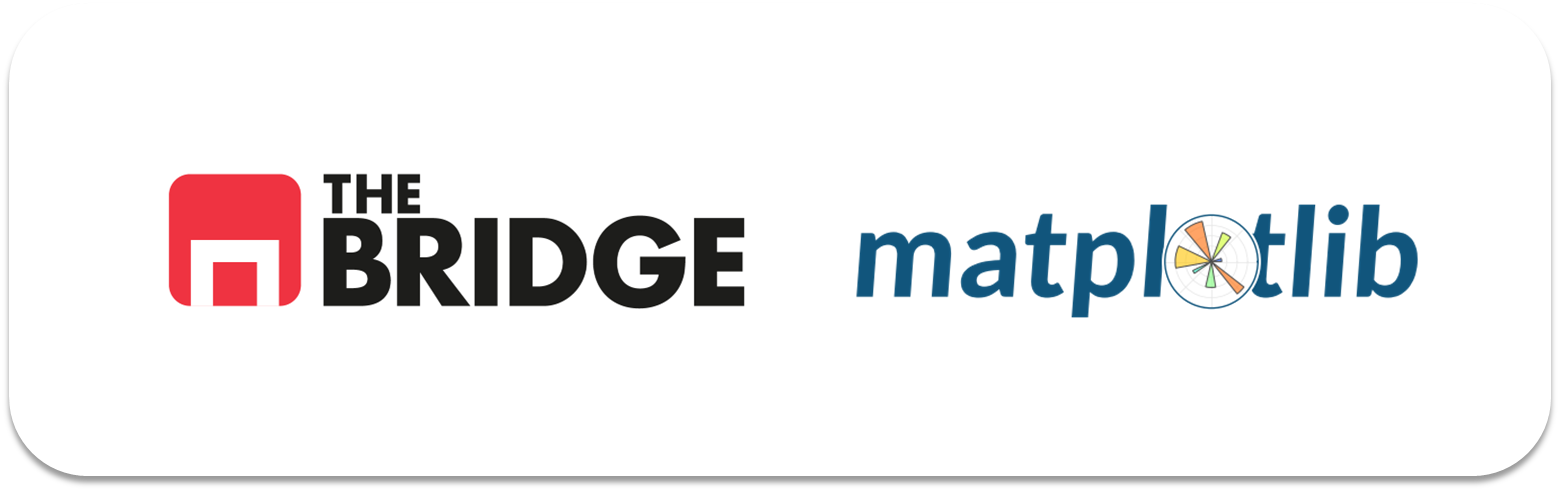

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center").
2. Histograma del área total ocupada por las ciudades.
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

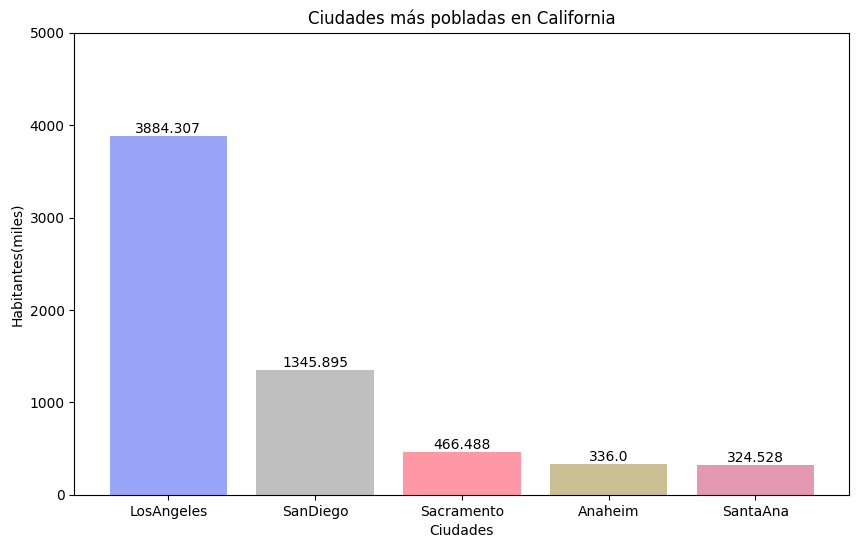

In [232]:

# Ordenar el DataFrame por población de manera descendente
df_sorted = df.sort_values(by="population_total", ascending=False)

# Seleccionar las N ciudades más pobladas que deseas mostrar en la figura
N = 5  # Puedes ajustar este valor según tus necesidades
top_cities = df_sorted.head(N)

# gráfico
plt.figure(figsize=(10, 6))
colores = [(0.2,0.3,0.95),"gray",(1.0,0.2,0.3),(0.58,0.50,0.16),(0.8,0.2,0.4)] # jugando con RRGGBB
bars = plt.bar(top_cities['city'], top_cities['population_total']/1000, color = colores, alpha = 0.5) # dividido por 1000 para tener miles de habitantes
for bar in bars:
    #  posición x y y de la barra
    x_position = bar.get_x() + bar.get_width() / 2
    y_position = bar.get_height()
    plt.text(x_position, y_position, f'{bar.get_height():}', # /2 para tener el numero justo dondo esta la barra, sino no cuadra
             ha='center', va='bottom', fontsize=10, color='black')

# ha='center' -> Alineación horizontal al centro
# va='bottom' -> Alineación vertical en la parte inferior de la barra
plt.ylim(0,5000)             
plt.title('Ciudades más pobladas en California')
plt.xlabel('Ciudades')
plt.ylabel('Habitantes(miles)');


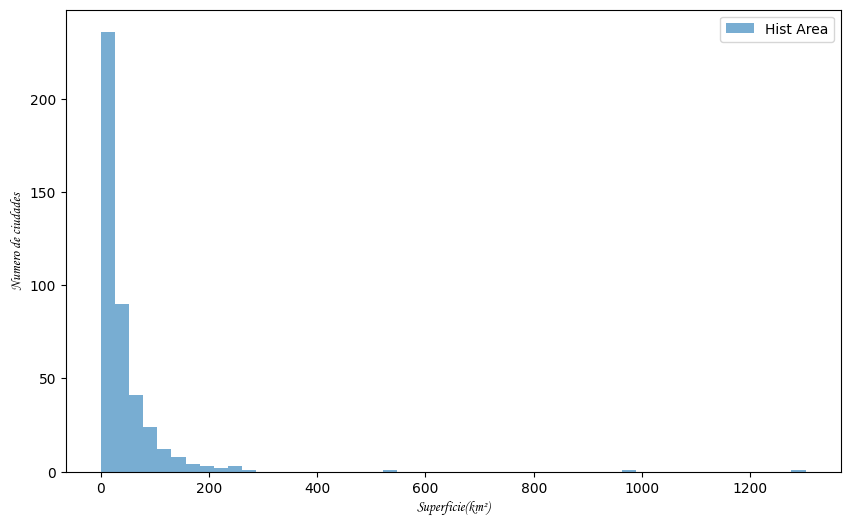

In [191]:
plt.figure(figsize=(10, 6))

# Crear el histograma del área total
plt.hist(df['area_total_km2'], bins=50, alpha=0.6, label = "Hist Area")


plt.xlabel('Superficie(km²)', family = "Monotype Corsiva")
plt.ylabel('Numero de ciudades', family = "Monotype Corsiva")

plt.legend(loc='upper right');


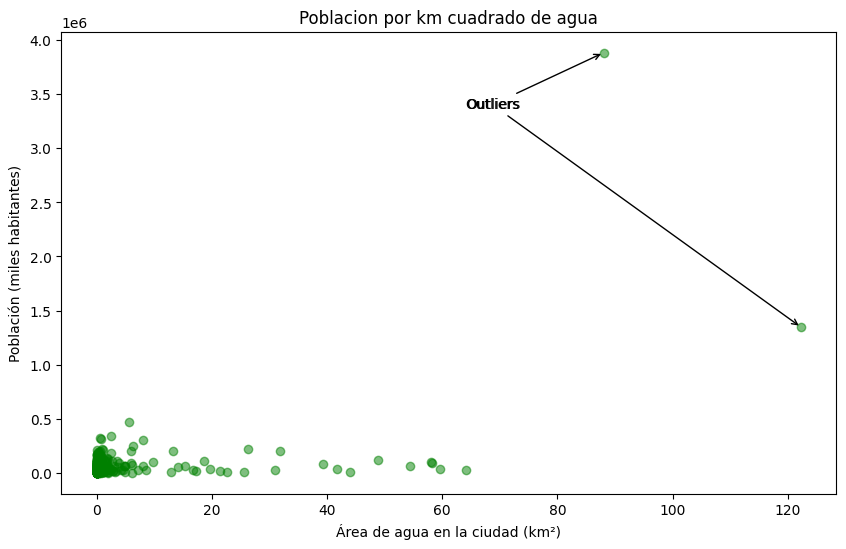

In [199]:
plt.figure(figsize=(10, 6))

# Crear el scatter plot de área de agua vs. población
plt.scatter(df['area_water_km2'], df['population_total'], color='green', alpha=0.5)


plt.title('Poblacion por km cuadrado de agua')
plt.xlabel('Área de agua en la ciudad (km²)')
plt.ylabel('Población (miles habitantes)')

outlier1 = df[(df['area_water_km2'] > 80)].iloc[0]
outlier2 = df[(df['area_water_km2'] > 80)].iloc[1]



props_flecha = {
    "arrowstyle": "->", 
}

plt.annotate("Outliers", (outlier1['area_water_km2'], outlier1['population_total']),
             xytext=(-99, -40), textcoords='offset points',
             arrowprops= props_flecha)


plt.annotate("Outliers", (outlier2['area_water_km2'], outlier2['population_total']),
             xytext=(-242, 157.5), textcoords='offset points',
             arrowprops= props_flecha);

# oui, lo sé, lo unico que he encontrado es poner un "Outlier" encima del otro en el diagrama de dispersion para que aparezcan sobrepuestos...


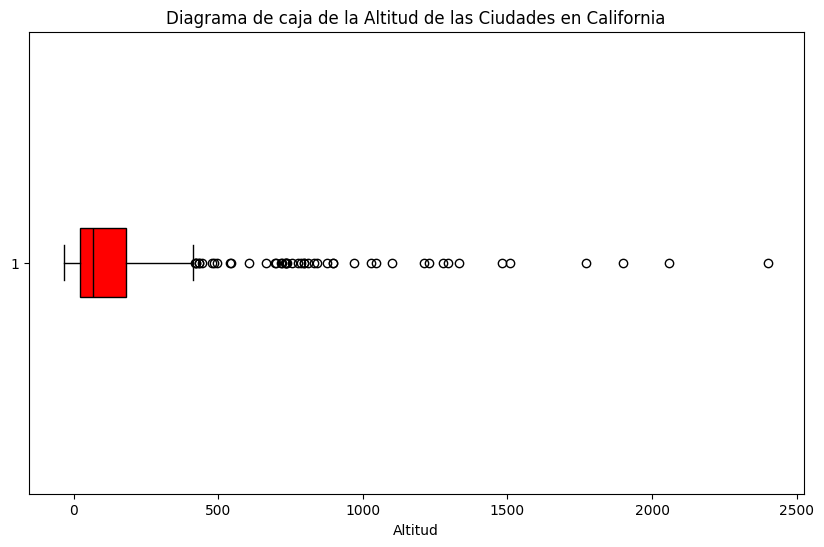

In [195]:
plt.figure(figsize=(10, 6))

# boxplot
plt.boxplot(df['elevation_m'], vert=False, boxprops= {"facecolor": "red"}, medianprops={'color': 'black', 'linewidth': 1}, patch_artist = True)
#queremos las cajas horizontales, asi que vert=False
#no olvidar patch_artist = True porque sino no funciona
#la mediana Q2 esta en negro, asi que cambiamos las propriedades de la mediana con medianprops

plt.title('Diagrama de caja de la Altitud de las Ciudades en California')
plt.xlabel('Altitud');


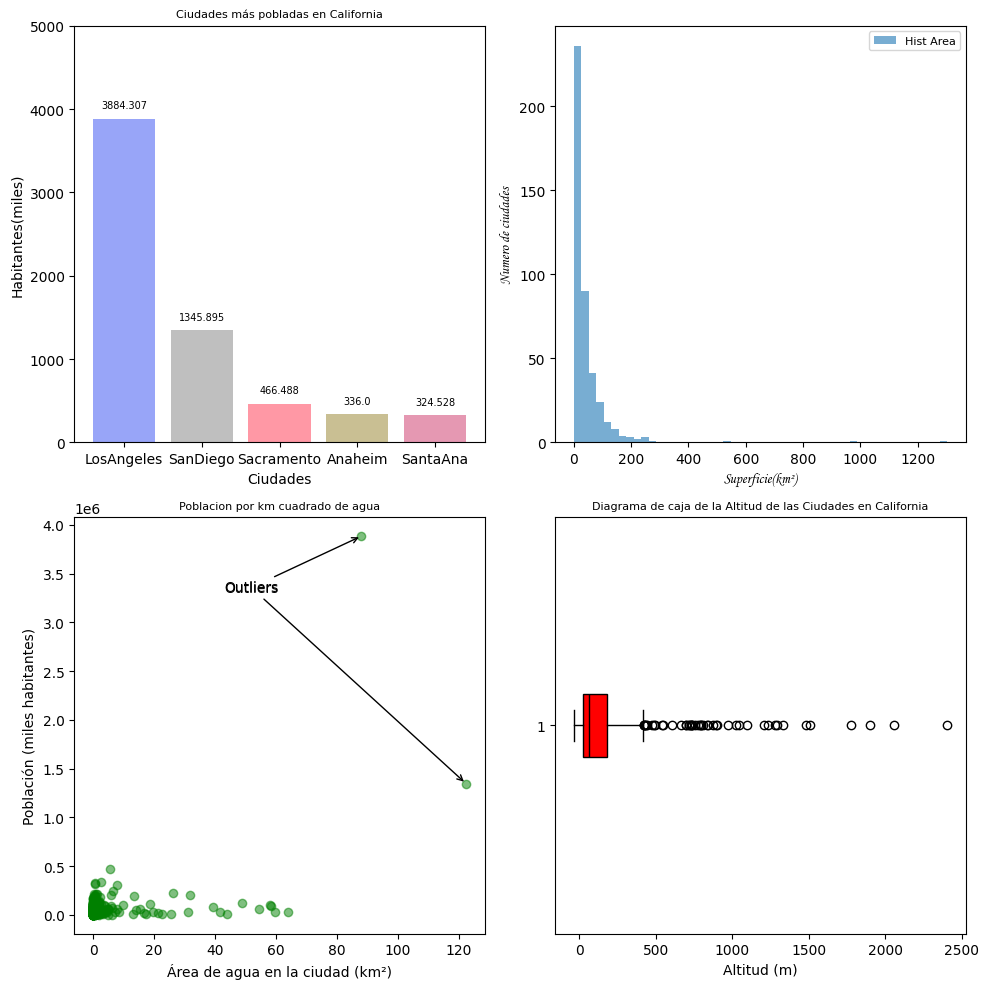

In [284]:


# Ordenar el DataFrame por población de manera descendente
df_sorted = df.sort_values(by="population_total", ascending=False)

# Seleccionar las N ciudades más pobladas que deseas mostrar en la figura
N = 5  # Puedes ajustar este valor según tus necesidades
top_cities = df_sorted.head(N)

# gráfico de barras
fig, axs = plt.subplots(2, 2, figsize=(10,10))
colores = [(0.2,0.3,0.95),"gray",(1.0,0.2,0.3),(0.58,0.50,0.16),(0.8,0.2,0.4)] # jugando con RRGGBB
axs[0, 0].bar(top_cities['city'], top_cities['population_total']/1000, color = colores, alpha = 0.5) # dividido por 1000 para tener miles de habitantes            
for bar in bars:
    #  posición x y y de la barra
    x_position = bar.get_x() + bar.get_width() / 2
    y_position = bar.get_height() + 100 #añado aqui 100 para subir un poco los valores encima de las barras
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, y_position, f'{bar.get_height():}', # /2 para tener el numero justo dondo esta la barra, sino no cuadra
             ha='center', va='bottom', fontsize=7, color='black')
axs[0, 0].set_ylim(0,5000)
axs[0, 0].set_title('Ciudades más pobladas en California', fontsize= 8)
axs[0, 0].set_xlabel('Ciudades')
axs[0, 0].set_ylabel('Habitantes(miles)');

# Crear el histograma del área total
axs[0, 1].hist(df['area_total_km2'], bins=50, alpha=0.6, label = "Hist Area")
axs[0, 1].set_xlabel('Superficie(km²)', family = "Monotype Corsiva")
axs[0, 1].set_ylabel('Numero de ciudades', family = "Monotype Corsiva")
axs[0, 1].legend(loc='upper right', fontsize= 8);



# Crear el scatter plot de área de agua vs. población
axs[1, 0].scatter(df['area_water_km2'], df['population_total'], color='green', alpha=0.5)
axs[1, 0].set_title('Poblacion por km cuadrado de agua', fontsize= 8)
axs[1, 0].set_xlabel('Área de agua en la ciudad (km²)')
axs[1, 0].set_ylabel('Población (miles habitantes)')

outlier1 = df[(df['area_water_km2'] > 80)].iloc[0]
outlier2 = df[(df['area_water_km2'] > 80)].iloc[1]
props_flecha = {
    "arrowstyle": "->", 
}

axs[1, 0].annotate("Outliers", (outlier1['area_water_km2'], outlier1['population_total']),
             xytext=(-99, -40), textcoords='offset points',
             arrowprops= props_flecha)

axs[1, 0].annotate("Outliers", (outlier2['area_water_km2'], outlier2['population_total']),
             xytext=(-174.2, 138.3), textcoords='offset points',
             arrowprops= props_flecha);

# oui, lo sé, lo unico que he encontrado es poner un "Outlier" encima del otro en el diagrama de dispersion para que aparezcan sobrepuestos...



# boxplot
axs[1, 1].boxplot(df['elevation_m'], vert=False, boxprops= {"facecolor": "red"}, medianprops={'color': 'black', 'linewidth': 1}, patch_artist = True)
#queremos las cajas horizontales, asi que vert=False
#no olvidar patch_artist = True porque sino no funciona
#la mediana Q2 esta en negro, asi que cambiamos las propriedades de la mediana con medianprops
axs[1, 1].set_title('Diagrama de caja de la Altitud de las Ciudades en California', fontsize= 8)
axs[1, 1].set_xlabel('Altitud (m)');

plt.tight_layout()
plt.show()

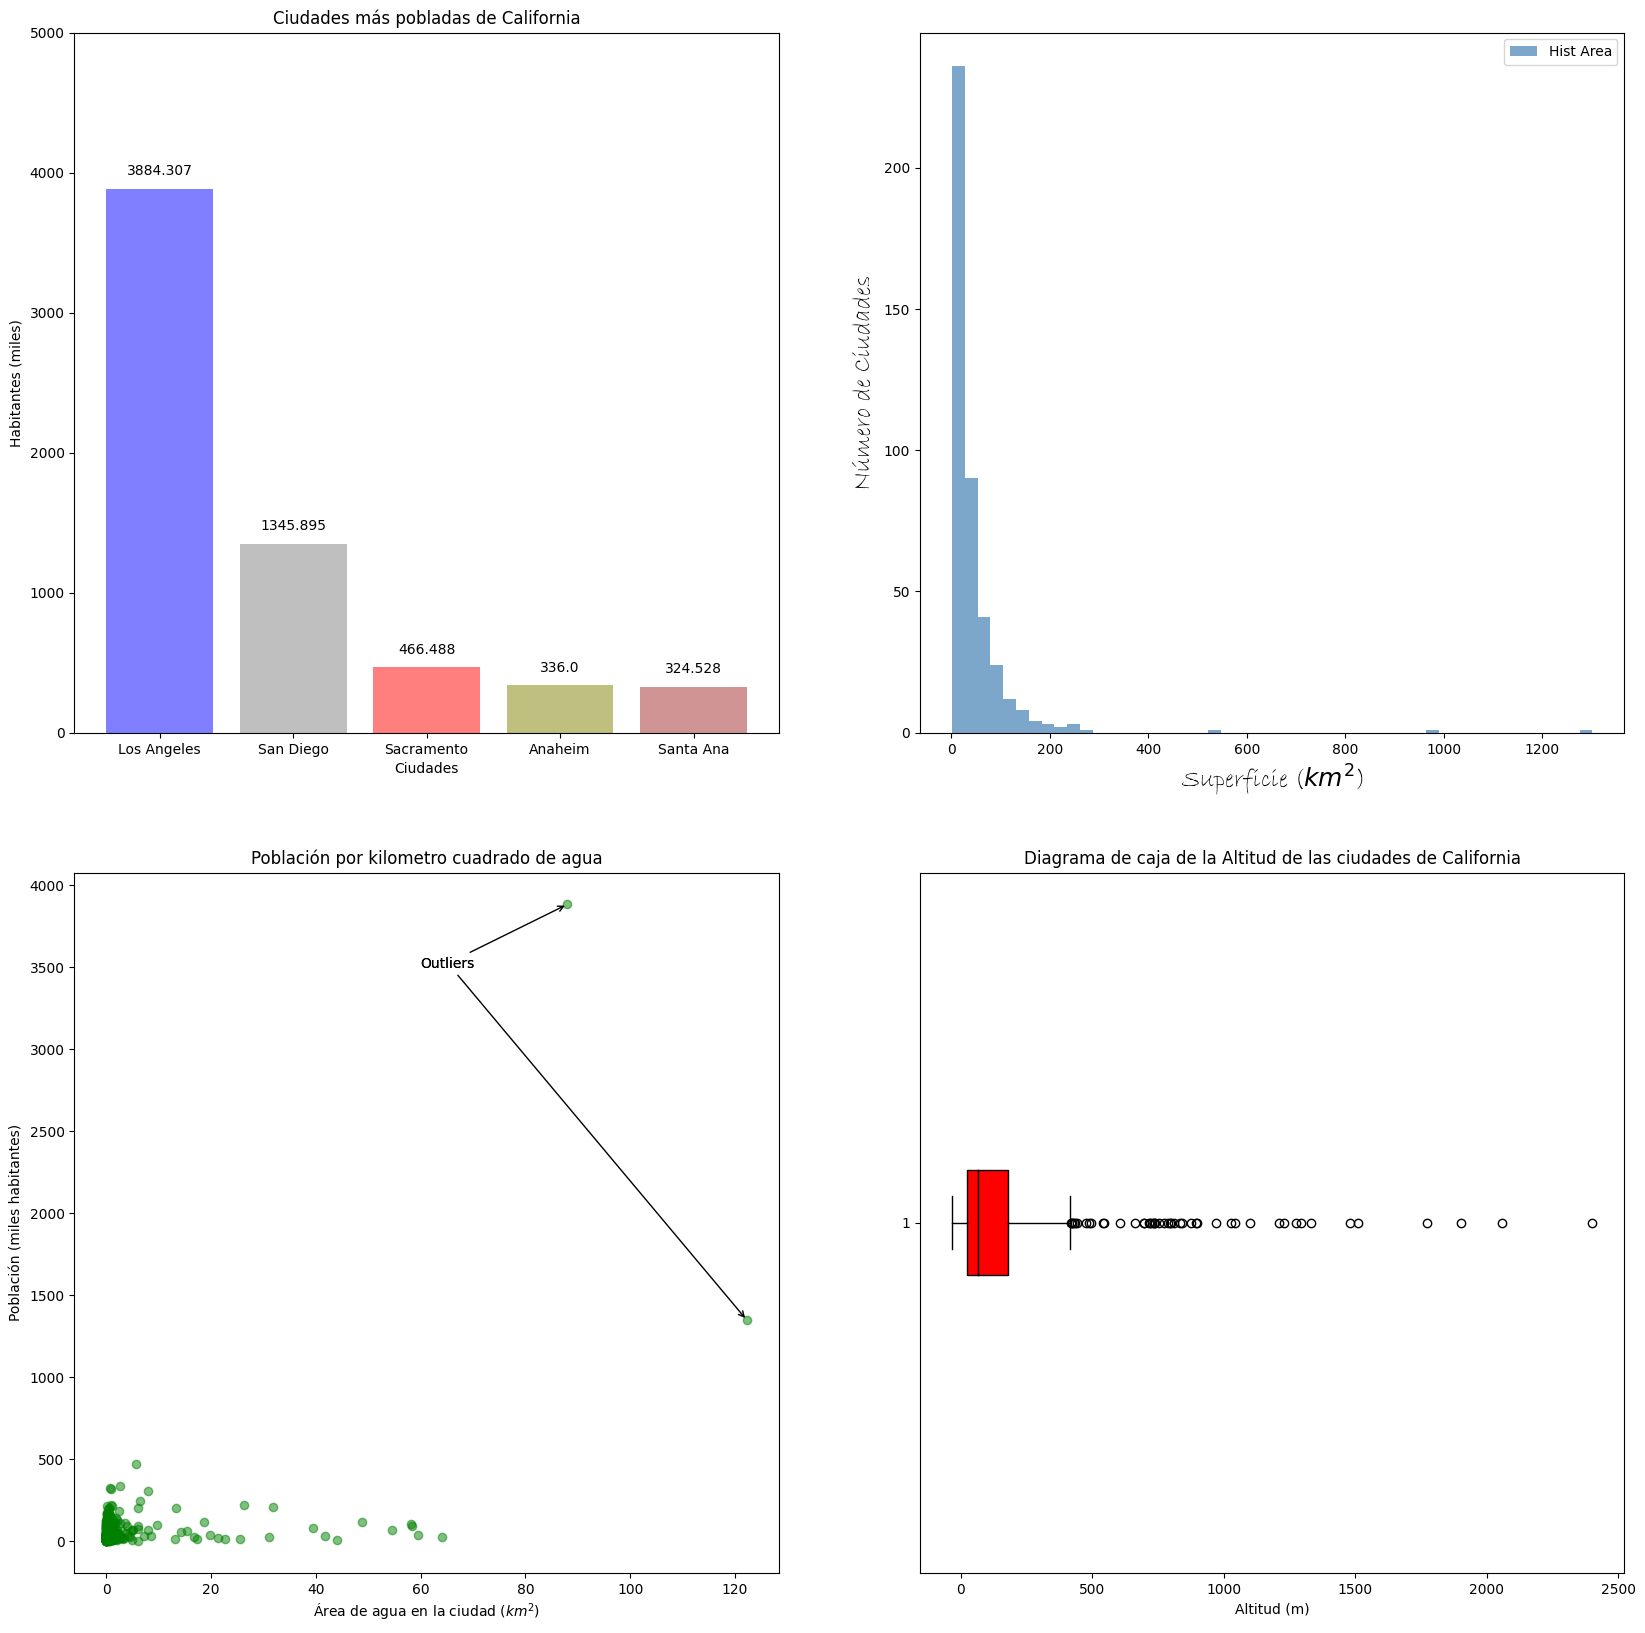

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [285]:
fig.savefig("./my_figure_Sprint8unit1_Samuel.png")